In [2079]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2080]:
df = pd.read_excel('xG.xlsx', sheet_name="Match 88")


In [2081]:
df.head()

,series_id,series_name,match_id,match_no,team_id,team_name,player_id,full_name,x_coord,y_coord,...,opp_team_id,opp_team_name,half,event_type_id,event_type,number_of_defenders,distance,angle,goal_outcome,xg_value
0,259,"Indian Super League, 2021-22",43981,Match 88,656,Bengaluru FC,152306,Prince Vinny Ibara Doniama,22.47,34.89,...,1536,Hyderabad FC,1,148,Right Foot,2,18.856368,0.383313,0,0.069264
1,259,"Indian Super League, 2021-22",43981,Match 88,1536,Hyderabad FC,70153,Javier Siverio Toro,93.55,37.28,...,656,Bengaluru FC,1,18,Right Foot,1,8.235448,0.812517,1,0.372474
2,259,"Indian Super League, 2021-22",43981,Match 88,1536,Hyderabad FC,70153,Javier Siverio Toro,93.33,37.49,...,656,Bengaluru FC,1,13,Right Foot,1,8.235448,0.812517,0,0.372474
3,259,"Indian Super League, 2021-22",43981,Match 88,1536,Hyderabad FC,70153,Javier Siverio Toro,97.44,29.47,...,656,Bengaluru FC,1,10,Right Foot,1,6.721800,0.725356,0,0.377294
4,259,"Indian Super League, 2021-22",43981,Match 88,1536,Hyderabad FC,63452,Rohit Danu,88.80,18.20,...,656,Bengaluru FC,1,13,Right Foot,1,20.921343,0.218156,0,0.064880


In [2082]:
df['minutes'] = df['minutes'].astype(int)
df['seconds'] = df['seconds'].astype(int)

#

In [2083]:
#add minutes and seconds to the dataframe
df['time'] = df['minutes']*60 + df['seconds']

In [2084]:
df.columns

Index(['series_id', 'series_name', 'match_id', 'match_no', 'team_id',
       'team_name', 'player_id', 'full_name', 'x_coord', 'y_coord', 'event_id',
       'event_name', 'minutes', 'seconds', 'opp_team_id', 'opp_team_name',
       'half', 'event_type_id', 'event_type', 'number_of_defenders',
       'distance', 'angle', 'goal_outcome', 'xg_value', 'time'],
      dtype='object')

In [2085]:
df_copy = df.copy()

In [2086]:
#get following columns minutes, team_name, xg_value, full_name, event_name
df_copy = df_copy[['series_name', 'match_no', 'time', 'minutes', 'team_name', 'xg_value', 'full_name', 'event_name']]

In [2087]:
#cumulative xg_value for each team as new column
df_copy['agg_xg_value'] = df_copy.groupby(['team_name'])['xg_value'].cumsum()

In [2088]:

#within the sorted dataframe, sort by minutes
df_copy = df_copy.sort_values(["team_name", "agg_xg_value"], ascending = (True, True))

In [2089]:
df_copy

,series_name,match_no,time,minutes,team_name,xg_value,full_name,event_name,agg_xg_value
0,"Indian Super League, 2021-22",Match 88,237,3,Bengaluru FC,0.069264,Prince Vinny Ibara Doniama,Blocked shot,0.069264
6,"Indian Super League, 2021-22",Match 88,1442,24,Bengaluru FC,0.009057,Roshan Singh Naorem,Shot,0.078321
11,"Indian Super League, 2021-22",Match 88,2758,45,Bengaluru FC,0.017659,Roshan Singh Naorem,Shot,0.095980
13,"Indian Super League, 2021-22",Match 88,3217,53,Bengaluru FC,0.010374,Cleiton Augusto Oliveira Silva,Shot on Goal,0.106354
14,"Indian Super League, 2021-22",Match 88,3268,54,Bengaluru FC,0.159961,Sunil Chhetri,Shot,0.266315
15,"Indian Super League, 2021-22",Match 88,3382,56,Bengaluru FC,0.182016,Prince Vinny Ibara Doniama,Blocked shot,0.448331
16,"Indian Super League, 2021-22",Match 88,4087,68,Bengaluru FC,0.142948,Suresh Singh Wangjam,Blocked shot,0.591279
17,"Indian Super League, 2021-22",Match 88,4355,72,Bengaluru FC,0.088831,NaN,Shot,0.680110
19,"Indian Super League, 2021-22",Match 88,4748,79,Bengaluru FC,0.167908,Sunil Chhetri,Shot,0.848017
21,"Indian Super League, 2021-22",Match 88,5168,86,Bengaluru FC,0.401551,Sunil Chhetri,Goal,1.249569


In [2090]:
#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


#this finds our team names from the dataframe. This will only work as long as both teams took a shot

hteam = df_copy['team_name'].iloc[0]
ateam = df_copy['team_name'].iloc[-1]

for x in range(len(df_copy['xg_value'])):
    if df_copy['team_name'][x]==ateam:
        a_xG.append(df_copy['xg_value'][x])
        a_min.append(df_copy['minutes'][x])
    if df_copy['team_name'][x]==hteam:
        h_xG.append(df_copy['xg_value'][x])
        h_min.append(df_copy['minutes'][x])


#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

In [2091]:
#get Goals fro ateam and hteam
ateam_stats = df_copy[df_copy['team_name']==ateam]['event_name'].value_counts()
hteam_stats = df_copy[df_copy['team_name']==hteam]['event_name'].value_counts()

In [2092]:
ateam_goals = ateam_stats.get('Goal', 0)
ateam_goals

2

In [2093]:
hteam_goals = hteam_stats.get('Goal', 0)
hteam_goals

1

In [2094]:
#match no
match_no = df_copy['match_no'].iloc[0]
series_name = df_copy['series_name'].iloc[0]

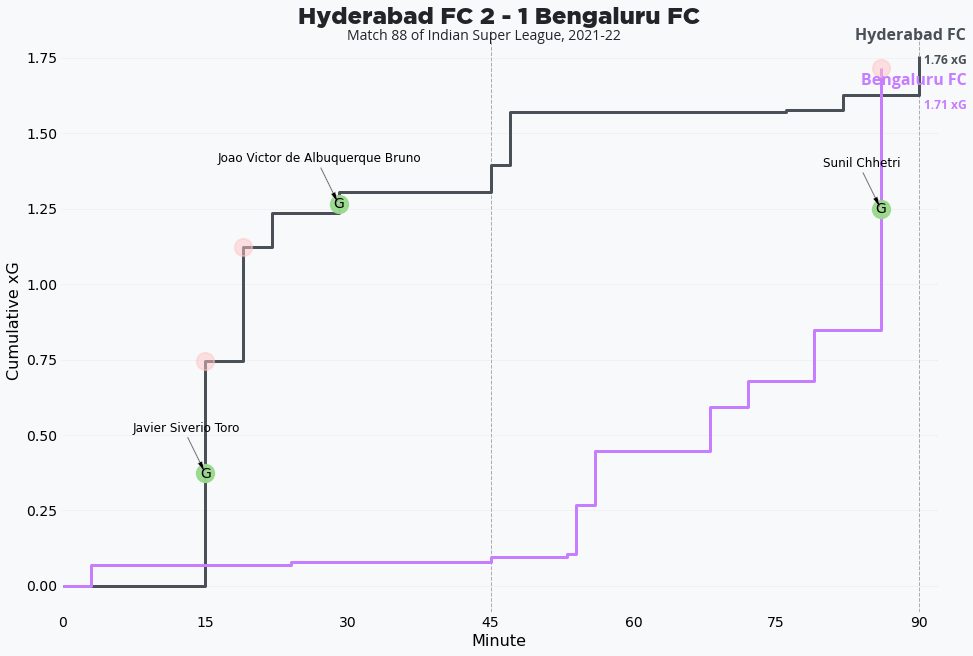

In [2095]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (14,10))
fig.set_facecolor('#f8f9fa')
ax.patch.set_facecolor('#f8f9fa')
plt.grid(False)

#set up our base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Trebushet MS',color='black',fontsize=16)
plt.ylabel('Cumulative xG',fontname='Trebushet MS',color='black',fontsize=16)

#reduce alpha of xticks
plt.gca().xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=15))
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(base=5))


#padding for the x axis and y axis
plt.xlim(-0.2,92)

#plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='#495057',label=ateam,linewidth=3,where='post', zorder=1)
ax.step(x=h_min,y=h_cumulative,color='#c77dff',label=hteam,linewidth=3,where='post', zorder=1)

#vertical line on 45 minutes
ax.axvline(x=45,color='black',linewidth=1,zorder=0, alpha=.3, linestyle='dashed')
ax.axvline(x=90,color='black',linewidth=1,zorder=0, alpha=.3, linestyle='dashed')

#show a circle for each Goal
for x in range(len(df_copy['event_name'])):
    if df_copy['event_name'][x]=='Goal':
        ax.scatter(x=df_copy['minutes'][x],y=df_copy['agg_xg_value'][x],color='#99d98c',s=300,zorder=2, marker='o', alpha=.95, linewidth=2)

#show event_name Goal as G
for i, row in df_copy.iterrows():
    if row['event_name'] == 'Goal':
        ax.annotate('G', xy=(row['minutes'], row['agg_xg_value']), xytext=(row['minutes'], row['agg_xg_value']),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=14, color='black', zorder=3)
    

for x in range(len(df_copy['event_name'])):
    if df_copy['xg_value'][x]>0.3 and df_copy['event_name'][x]!='Goal':
        ax.scatter(x=df_copy['minutes'][x],y=df_copy['agg_xg_value'][x],color='#ffc7c7',s=300,zorder=2, marker='o', alpha=.5, linewidth=2)


#annotate player name connecting an arrow to the Goal from left to right along with minutes
for i, row in df_copy.iterrows():
    if row['event_name'] == 'Goal':
        ax.annotate(row['full_name'], xy=(row['minutes'], row['agg_xg_value']), xytext=(row['minutes']-2, row['agg_xg_value']+0.15),
                    arrowprops=dict(facecolor='black', shrink=.01, width=1, headwidth=5),
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=12, color='black', zorder=2)

#title and subtitle
plt.title(f'{ateam} {ateam_goals} - {hteam_goals} {hteam}',fontname='Gotham Black',color='#212529',fontsize=24,zorder=1, pad=5)
plt.suptitle(f'{match_no} of {series_name}',fontname='Open Sans',color='#212529',fontsize=14,zorder=1, y=0.88)

#add text at the end of the graph to show the total xG and team names
ax.text(x=95,y=alast+.05,s=ateam,fontname='Open Sans',color='#495057',fontsize=16,zorder=3, fontweight='bold', ha='right')
ax.text(x=95,y=hlast-.05,s=hteam,fontname='Open Sans',color='#c77dff',fontsize=16,zorder=3, fontweight='bold', ha='right')
ax.text(x=95,y=alast-0.03,s=f'{alast} xG',fontname='Open Sans',color='#495057',fontsize=12,zorder=5, fontweight='bold', ha='right')
ax.text(x=95,y=hlast-0.13,s=f'{hlast} xG',fontname='Open Sans',color='#c77dff',fontsize=12,zorder=5, fontweight='bold', ha='right')


plt.savefig(f'{ateam}_vs_{hteam}_xG_cumulative.png', dpi=300, facecolor='#f8f9fa', edgecolor='#f8f9fa', bbox_inches='tight')